In [14]:
import scanpy as sc
import os
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from stGACN import stGACN
import scanpy as sc
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/root/miniconda3/envs/STAR/lib/R"
print(device)

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:3


In [ ]:
adata = sc.read('MOD_slice1.h5ad')
adata

In [ ]:
model = stGACN.stGACN(adata,neighborhood=6,k_cutoff=6, device=device, model_select='KNN')
adata = model.train()

50
6
delete=false
------Calculating spatial graph...
The graph contains 39490 edges, 7898 cells.
5.0000 neighbors per cell on average.
Graph constructed!
------Calculating spatial graph...
The graph contains 47388 edges, 7898 cells.
6.0000 neighbors per cell on average.
Size of Input:  (7898, 3000)
Begin to train ST data...


100%|██████████| 800/800 [01:34<00:00,  8.45it/s]


Optimization finished for ST data!


In [17]:
# set radius to specify the number of neighbors considered during refinement
radius = 30
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"
tool = 'leiden' # mclust, leiden, and louvain
n_clusters = 6
# clustering
from stGACN.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=0.5, increment=0.01, refinement=True)

Searching resolution...
resolution=0.48999999999999977, cluster number=6


<AxesSubplot:title={'center':'stGACN'}, xlabel='spatial1', ylabel='spatial2'>

<Figure size 640x480 with 0 Axes>

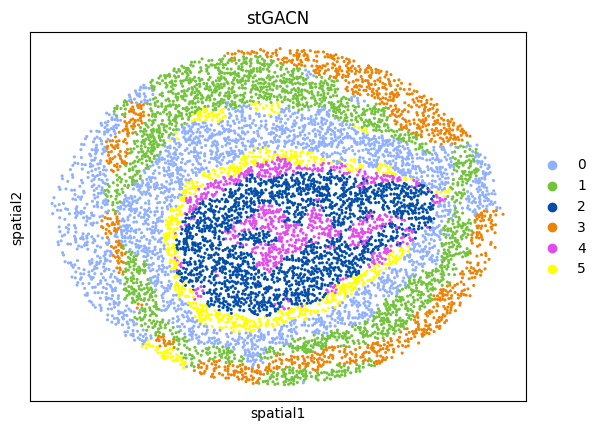

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
colors = ['#8FB0FF', '#71c33a','#024CAA','#EC8305', '#e14aec', '#FFFF00']
sc.pl.embedding(adata, basis="spatial", color="domain",s=20, show=False, title='stGACN',palette=colors)

In [36]:
#adata.write_h5ad('/home/zhangxinming/mymodel/h5ad/mousebulb/m8new.h5ad')